In [1]:
#Data Exploration and Preprocessing:


import pandas as pd

# Load the dataset
data = pd.read_csv(r"E:\New folder\DS Incomplete Assignments\EDA2  6\adult_with_headers.csv")
# Summary statistics
print(data.describe())

# Check data types and non-null counts
print(data.info())

# Check for missing values
print(data.isnull().sum())


                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries

In [2]:
# Replace '?' with NaN
data.replace('NaN', pd.NA, inplace=True)

# Check for missing values again
print(data.isnull().sum())

# Impute or drop missing values
# Option 1: Drop rows with missing values
data_cleaned = data.dropna()
from sklearn.preprocessing import StandardScaler

# Select numerical features
numerical_features = ['age', 'fnlwgt', 'education_num', 'hours_per_week']
scaler_standard = StandardScaler()
data[numerical_features] = scaler_standard.fit_transform(data[numerical_features])
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
data[numerical_features] = scaler_minmax.fit_transform(data[numerical_features])


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [7]:
#2. Encoding Techniques:

In [3]:
# Identify categorical variables
categorical_vars = data.select_dtypes(include=['object']).columns

# Count unique values in each categorical variable
category_counts = {var: data[var].nunique() for var in categorical_vars}
print(category_counts)

# Example categorical variables with less than 5 categories
low_cardinality_vars = [var for var, count in category_counts.items() if count < 5]
# Apply One-Hot Encoding
data = pd.get_dummies(data, columns=low_cardinality_vars, drop_first=True)
# Example categorical variables with more than 5 categories
high_cardinality_vars = [var for var, count in category_counts.items() if count > 5]
from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoder
label_encoders = {}
for var in high_cardinality_vars:
    le = LabelEncoder()
    data[var] = le.fit_transform(data[var])
    label_encoders[var] = le  # Save the encoder for future use


{'workclass': 9, 'education': 16, 'marital_status': 7, 'occupation': 15, 'relationship': 6, 'race': 5, 'sex': 2, 'native_country': 42, 'income': 2}


In [ ]:
#3. Feature Engineering:

In [4]:

import pandas as pd
import numpy as np


# Age Group Feature
def categorize_age(age):
    if age < 25:
        return '18-24'
    elif age < 35:
        return '25-34'
    elif age < 45:
        return '35-44'
    elif age < 55:
        return '45-54'
    elif age < 65:
        return '55-64'
    else:
        return '65+'

data['age_group'] = data['age'].apply(categorize_age)
print(data['age_group'].value_counts())

# Income-to-Hours Ratio
# Make sure to replace 'income' with the correct column name if different
income_column = 'income'  # Replace with the actual column name if necessary
if income_column in data.columns:
    data['income_to_hours'] = data['hours_per_week'] / (data[income_column].apply(lambda x: 1 if x == '>50K' else 0.5))
    print(data['income_to_hours'].describe())
else:
    print(f"Column '{income_column}' not found!")

# Log Transformation on fnlwgt
data['log_fnlwgt'] = np.log(data['fnlwgt'] + 1)
print(data['log_fnlwgt'].describe())


18-24    32561
Name: age_group, dtype: int64
Column 'income' not found!
count    32561.000000
mean         0.111866
std          0.061774
min          0.000000
25%          0.069227
50%          0.106868
75%          0.142064
max          0.693147
Name: log_fnlwgt, dtype: float64


C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Original dataset size: 32561
Cleaned dataset size: 30933


C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.w

          x               y   ppscore            case  is_valid_score  \
0       age             age  1.000000  predict_itself            True   
1       age       workclass  0.005378  classification            True   
2       age          fnlwgt  0.000000      regression            True   
3       age       education  0.054854  classification            True   
4       age   education_num  0.000000      regression            True   
..      ...             ...       ...             ...             ...   
220  income    capital_gain  0.000000      regression            True   
221  income    capital_loss  0.000000      regression            True   
222  income  hours_per_week  0.000000      regression            True   
223  income  native_country  0.000000  classification            True   
224  income          income  1.000000  predict_itself            True   

                  metric  baseline_score   model_score  \
0                   None        0.000000      1.000000   
1      

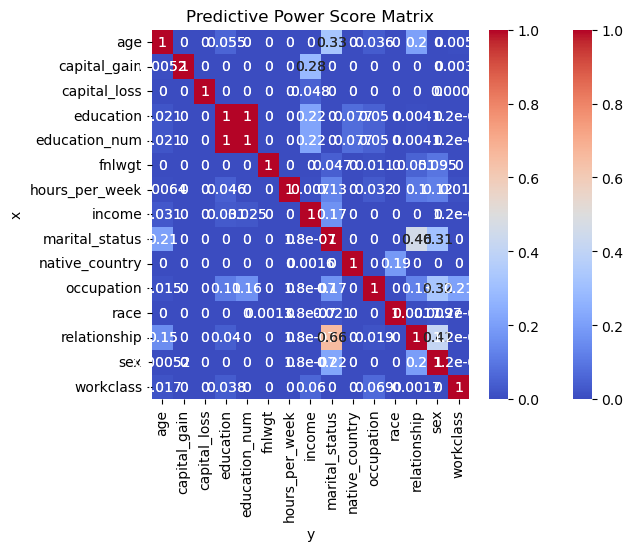

C:\Users\sathv\AppData\Local\Temp\ipykernel_23752\1513596360.py:36: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cleaned.corr()


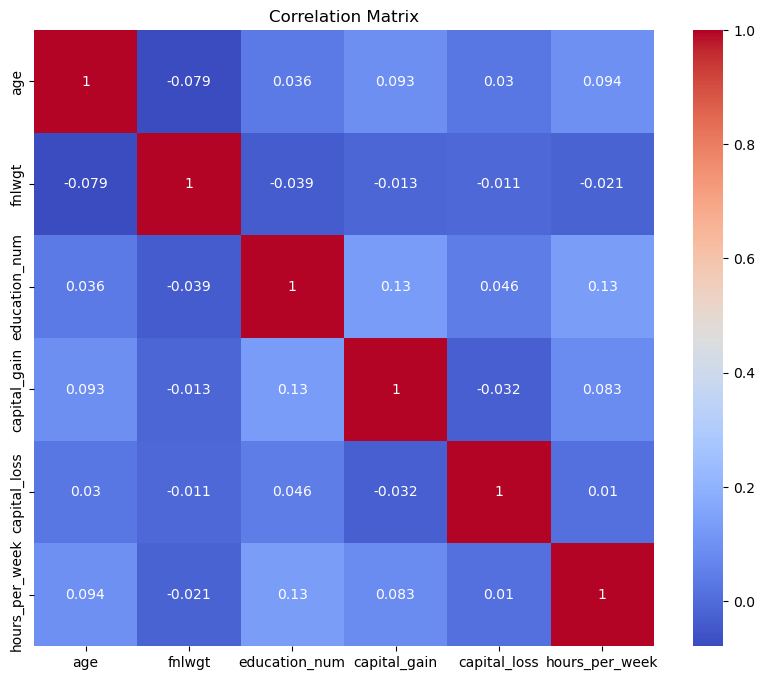

In [14]:
#4. Feature Selection:

!pip install pandas numpy scikit-learn ppscore seaborn matplotlib
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace with your dataset)
df = pd.read_csv(r"E:\New folder\DS Incomplete Assignments\EDA2  6\adult_with_headers.csv")
# Define the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)


# Fit the model and predict outliers
df['outlier'] = iso_forest.fit_predict(df.select_dtypes(include=[np.number]))
sns.heatmap(pps_matrix.pivot(index='x', columns='y', values='ppscore'), annot=True, cmap='coolwarm')


# Remove outliers
df_cleaned = df[df['outlier'] == 1].drop('outlier', axis=1)

print(f"Original dataset size: {df.shape[0]}")
print(f"Cleaned dataset size: {df_cleaned.shape[0]}")
# Calculate the PPS matrix
pps_matrix = pps.matrix(df_cleaned)

# Display the PPS matrix
print(pps_matrix)

# Visualize the PPS matrix
sns.heatmap(pps_matrix.pivot('x', 'y', 'ppscore'), annot=True, cmap='coolwarm')
plt.title('Predictive Power Score Matrix')
plt.show()
# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
